Supply chain Sales & Demand Forecasting Model with Random Forest and xgboost

       

1.Import and data check

In [351]:
import numpy as np
import pandas as pd

In [352]:
df = pd.read_csv('https://raw.githubusercontent.com/Raymond025/BA2/refs/heads/main/sales%20data.csv')

In [353]:
display(df.head())

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


In [354]:
#Data exploration-Explore the basic characteristics of the sales data: the shape, data types, descriptive statistics, and missing values.
#the shape of the DataFrame.
print("Shape of the DataFrame:", df.shape)

# Inspect the data types
print("\nData types of each column:\n", df.dtypes)

#descriptive statistics
print("\nDescriptive statistics for numerical features:\n", df.describe())

# Identify the missing values.
print("\nNumber of missing values in each column:\n", df.isnull().sum())

Shape of the DataFrame: (150150, 9)

Data types of each column:
 record_ID            int64
week                object
store_id             int64
sku_id               int64
total_price        float64
base_price         float64
is_featured_sku      int64
is_display_sku       int64
units_sold           int64
dtype: object

Descriptive statistics for numerical features:
            record_ID       store_id         sku_id    total_price  \
count  150150.000000  150150.000000  150150.000000  150149.000000   
mean   106271.555504    9199.422511  254761.132468     206.626751   
std     61386.037861     615.591445   85547.306447     103.308516   
min         1.000000    8023.000000  216233.000000      41.325000   
25%     53111.250000    8562.000000  217217.000000     130.387500   
50%    106226.500000    9371.000000  222087.000000     198.075000   
75%    159452.750000    9731.000000  245338.000000     233.700000   
max    212644.000000    9984.000000  679023.000000     562.162500   

       

2.Data exploration and visualization

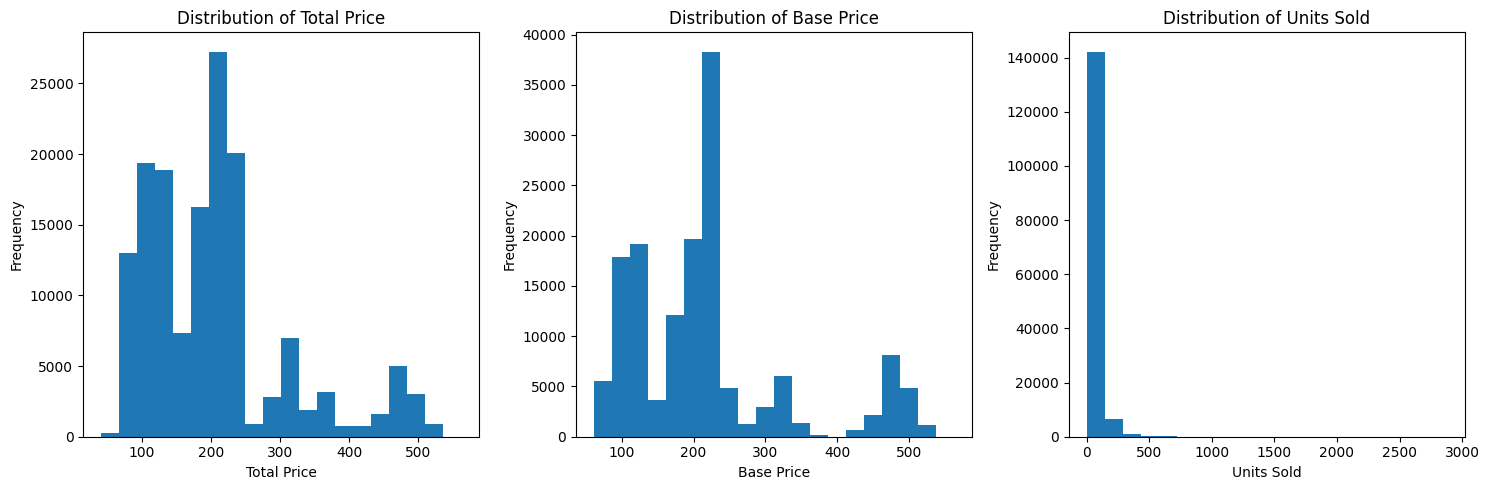

In [355]:
#Data visualization
import matplotlib.pyplot as plt

# Create histograms
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['total_price'], bins=20)
plt.title('Distribution of Total Price')
plt.xlabel('Total Price')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df['base_price'], bins=20)
plt.title('Distribution of Base Price')
plt.xlabel('Base Price')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(df['units_sold'], bins=20)
plt.title('Distribution of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

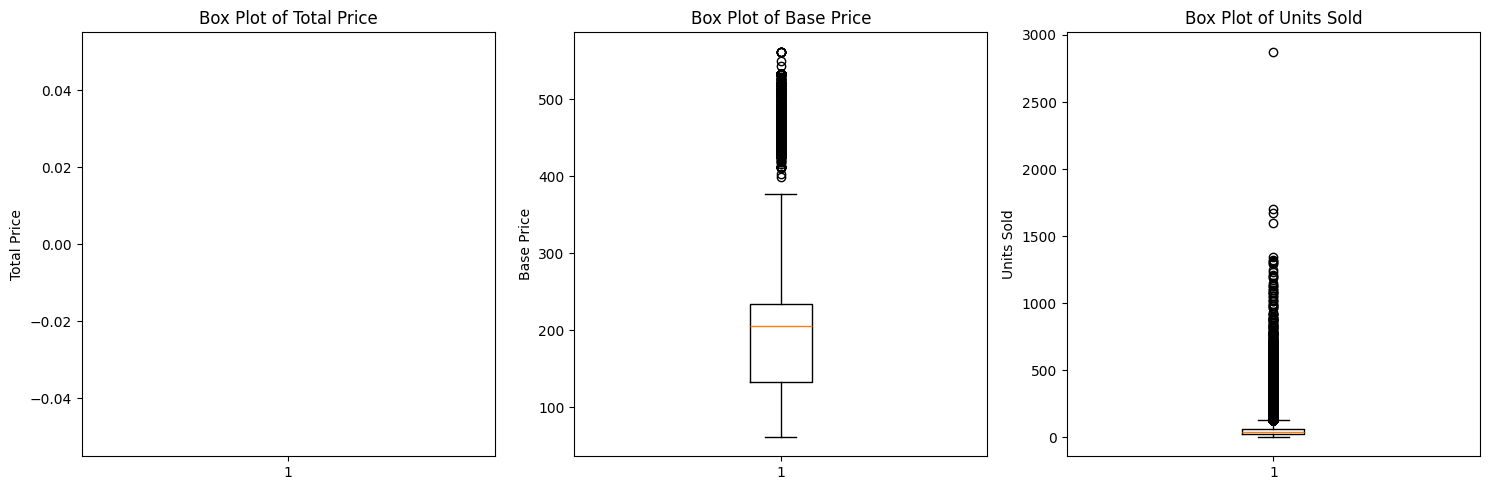

In [356]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import get_ipython
from IPython.display import display

#data read
df = pd.read_csv('https://raw.githubusercontent.com/Raymond025/BA2/refs/heads/main/sales%20data.csv')
# ... (other operations on df) ...

#box plots for quartiles and potential outliers.
plt.figure(figsize=(15, 5))

# Check 'total_price' column
if 'total_price' in df.columns:
    plt.subplot(1, 3, 1)
    plt.boxplot(df['total_price'])
    plt.title('Box Plot of Total Price')
    plt.ylabel('Total Price')
else:
    print("Column 'total_price' not found in DataFrame.")

# Check 'base_price' column
if 'base_price' in df.columns:  # Add this check
    plt.subplot(1, 3, 2)
    plt.boxplot(df['base_price'])
    plt.title('Box Plot of Base Price')
    plt.ylabel('Base Price')
else:
    print("Column 'base_price' not found in DataFrame.")  # Print message if not found

# Check 'units_sold' column
if 'units_sold' in df.columns:  # Add this check
    plt.subplot(1, 3, 3)
    plt.boxplot(df['units_sold'])
    plt.title('Box Plot of Units Sold')
    plt.ylabel('Units Sold')
else:
    print("Column 'units_sold' not found in DataFrame.")  # Print message if not found

plt.tight_layout()
plt.show()

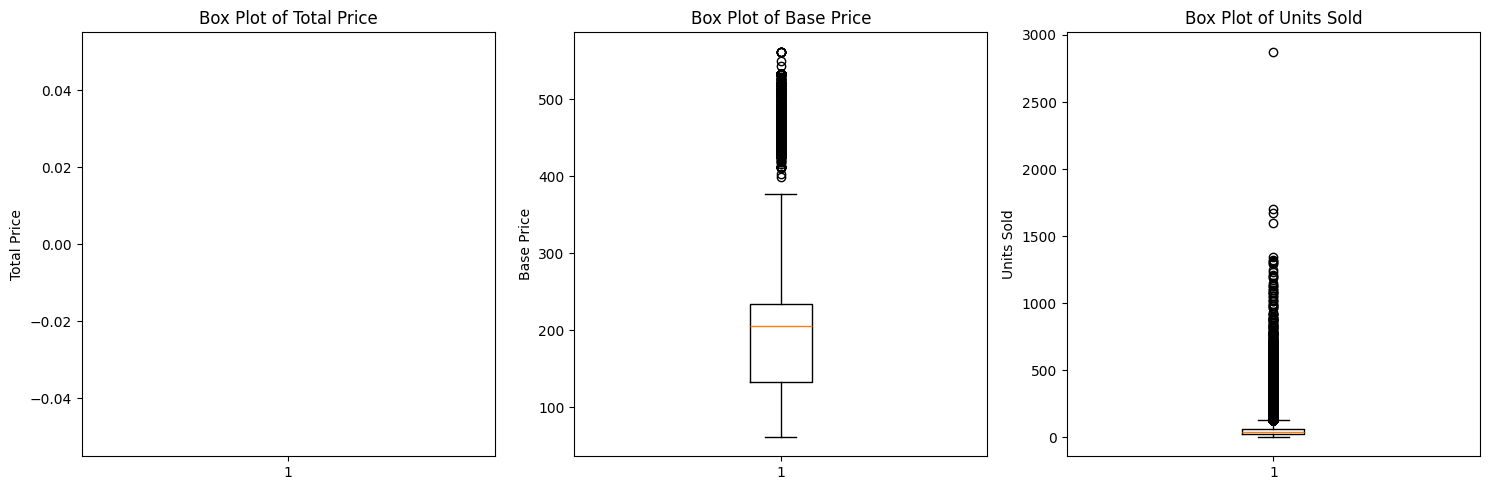

In [357]:
#box plots for quartiles and potential outliers.
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.boxplot(df['total_price'])
plt.title('Box Plot of Total Price')
plt.ylabel('Total Price')

plt.subplot(1, 3, 2)
plt.boxplot(df['base_price'])
plt.title('Box Plot of Base Price')
plt.ylabel('Base Price')

plt.subplot(1, 3, 3)
plt.boxplot(df['units_sold'])
plt.title('Box Plot of Units Sold')
plt.ylabel('Units Sold')

plt.tight_layout()
plt.show()

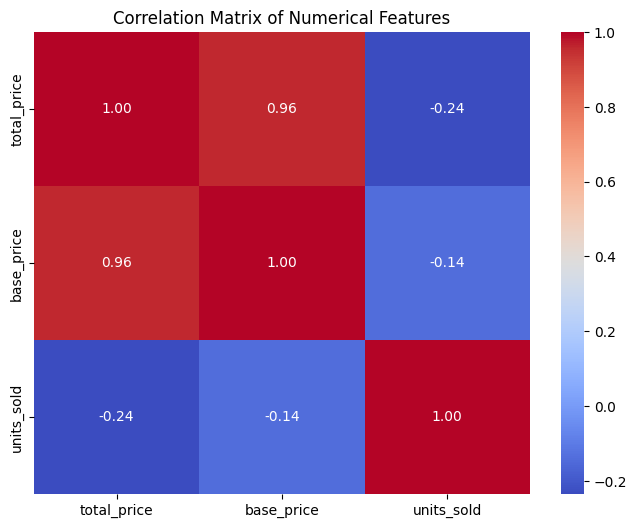

In [358]:
#correlation matrix
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df[['total_price', 'base_price', 'units_sold']].corr()

# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

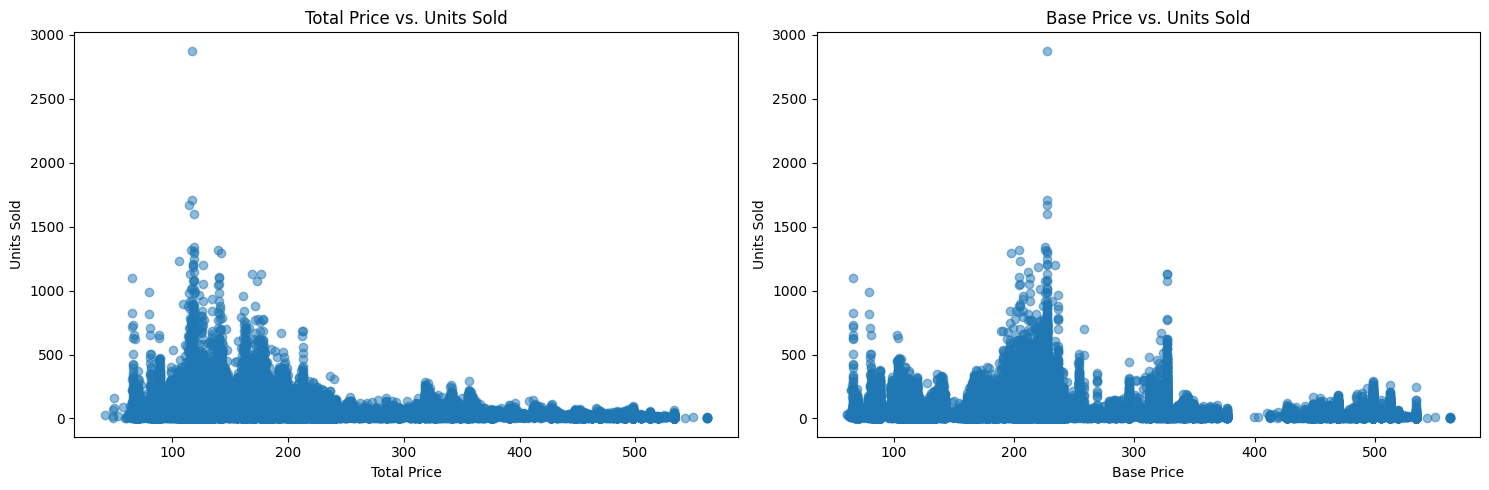

In [359]:
#scatter plots
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(df['total_price'], df['units_sold'], alpha=0.5)
plt.title('Total Price vs. Units Sold')
plt.xlabel('Total Price')
plt.ylabel('Units Sold')

plt.subplot(1, 2, 2)
plt.scatter(df['base_price'], df['units_sold'], alpha=0.5)
plt.title('Base Price vs. Units Sold')
plt.xlabel('Base Price')
plt.ylabel('Units Sold')

plt.tight_layout()
plt.show()

In [360]:
#Remove null values
df[df['total_price'].isnull()]

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
136949,193915,23/04/13,9436,245338,NaN,469.5375,0,0,1


In [361]:
df['total_price'] = df['total_price'].fillna(df['total_price'].mean())
print(df)

        record_ID      week  store_id  sku_id  total_price  base_price  \
0               1  17/01/11      8091  216418      99.0375    111.8625   
1               2  17/01/11      8091  216419      99.0375     99.0375   
2               3  17/01/11      8091  216425     133.9500    133.9500   
3               4  17/01/11      8091  216233     133.9500    133.9500   
4               5  17/01/11      8091  217390     141.0750    141.0750   
...           ...       ...       ...     ...          ...         ...   
150145     212638  09/07/13      9984  223245     235.8375    235.8375   
150146     212639  09/07/13      9984  223153     235.8375    235.8375   
150147     212642  09/07/13      9984  245338     357.6750    483.7875   
150148     212643  09/07/13      9984  547934     141.7875    191.6625   
150149     212644  09/07/13      9984  679023     234.4125    234.4125   

        is_featured_sku  is_display_sku  units_sold  
0                     0               0          20  
1  

In [362]:
df[df['total_price'].isnull()]

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold


In [363]:
df['key'] = df['week'].astype(str)+'__'+df['store_id'].astype(str)
df['key']

,key
0,17/01/11__8091
1,17/01/11__8091
2,17/01/11__8091
3,17/01/11__8091
4,17/01/11__8091
...,...
150145,09/07/13__9984
150146,09/07/13__9984
150147,09/07/13__9984
150148,09/07/13__9984


In [364]:
df = df.drop(['record_ID', 'week', 'store_id', 'sku_id', 'total_price', 'base_price', 'is_featured_sku', 'is_display_sku'], axis=1)

In [365]:
df = df.groupby('key').sum()

In [366]:
# Assuming 'key'
df = df.drop(['units_sold'], axis=1, errors='ignore')  # Drop 'units_sold' column if it exists
# df = df.reset_index()
# df = df.drop(['record_ID', 'week', 'store_id', 'sku_id', 'total_price', 'base_price', 'is_featured_sku', 'is_display_sku'], axis=1) #This will likely run without error now

In [367]:
df = df.groupby('key').sum()
df

""
key
01/01/13__8023
01/01/13__8058
01/01/13__8063
01/01/13__8091
01/01/13__8094
...
31/10/11__9890
31/10/11__9909
31/10/11__9954


<Axes: xlabel='key'>

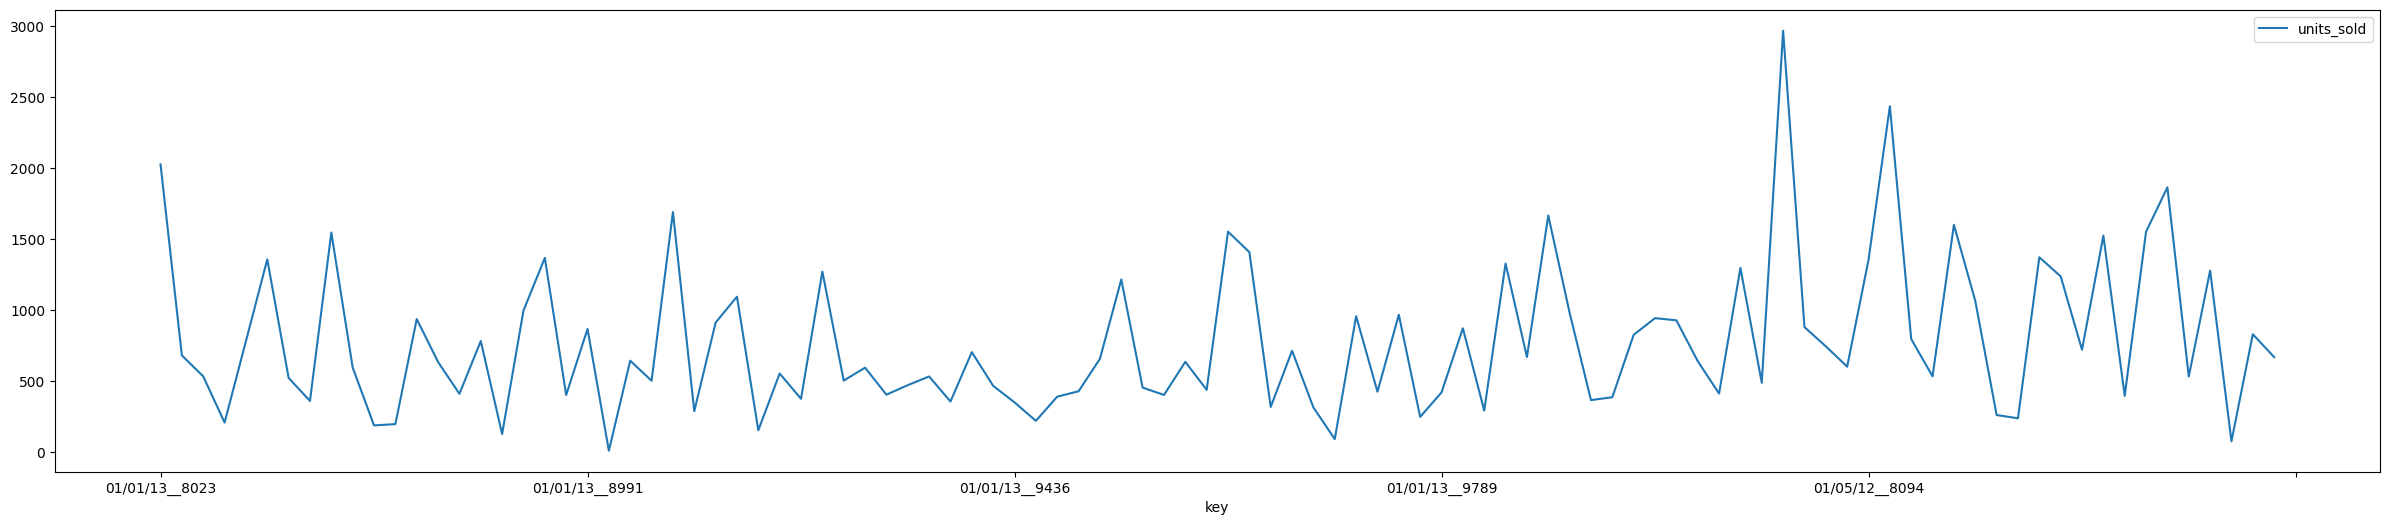

In [368]:
import numpy as np
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Raymond025/BA2/refs/heads/main/sales%20data.csv')
df['key'] = df['week'].astype(str) + '__' + df['store_id'].astype(str)

# Group by 'key' and sum 'units_sold'
df = df.groupby('key')['units_sold'].sum().reset_index()

#plot
df[:100].plot(x='key', y='units_sold', figsize=(30, 6))

3. variables setup with input and output;The model predicts sales based on the previous 4 days.

In [369]:
df['day1'] = df['units_sold'].shift(-1)
df['day2'] = df['units_sold'].shift(-2)
df['day3'] = df['units_sold'].shift(-3)
df['day4'] = df['units_sold'].shift(-4)
df

,key,units_sold,day1,day2,day3,day4
0,01/01/13__8023,2025,682.0,535.0,210.0,782.0
1,01/01/13__8058,682,535.0,210.0,782.0,1357.0
2,01/01/13__8063,535,210.0,782.0,1357.0,524.0
3,01/01/13__8091,210,782.0,1357.0,524.0,362.0
4,01/01/13__8094,782,1357.0,524.0,362.0,1546.0
...,...,...,...,...,...,...
9875,31/10/11__9890,531,551.0,431.0,820.0,506.0
9876,31/10/11__9909,551,431.0,820.0,506.0,NaN
9877,31/10/11__9954,431,820.0,506.0,NaN,NaN
9878,31/10/11__9961,820,506.0,NaN,NaN,NaN


In [370]:
#remove null value
df = df.dropna()
df

,key,units_sold,day1,day2,day3,day4
0,01/01/13__8023,2025,682.0,535.0,210.0,782.0
1,01/01/13__8058,682,535.0,210.0,782.0,1357.0
2,01/01/13__8063,535,210.0,782.0,1357.0,524.0
3,01/01/13__8091,210,782.0,1357.0,524.0,362.0
4,01/01/13__8094,782,1357.0,524.0,362.0,1546.0
...,...,...,...,...,...,...
9871,31/10/11__9876,363,292.0,698.0,908.0,531.0
9872,31/10/11__9879,292,698.0,908.0,531.0,551.0
9873,31/10/11__9880,698,908.0,531.0,551.0,431.0
9874,31/10/11__9881,908,531.0,551.0,431.0,820.0


<Axes: >

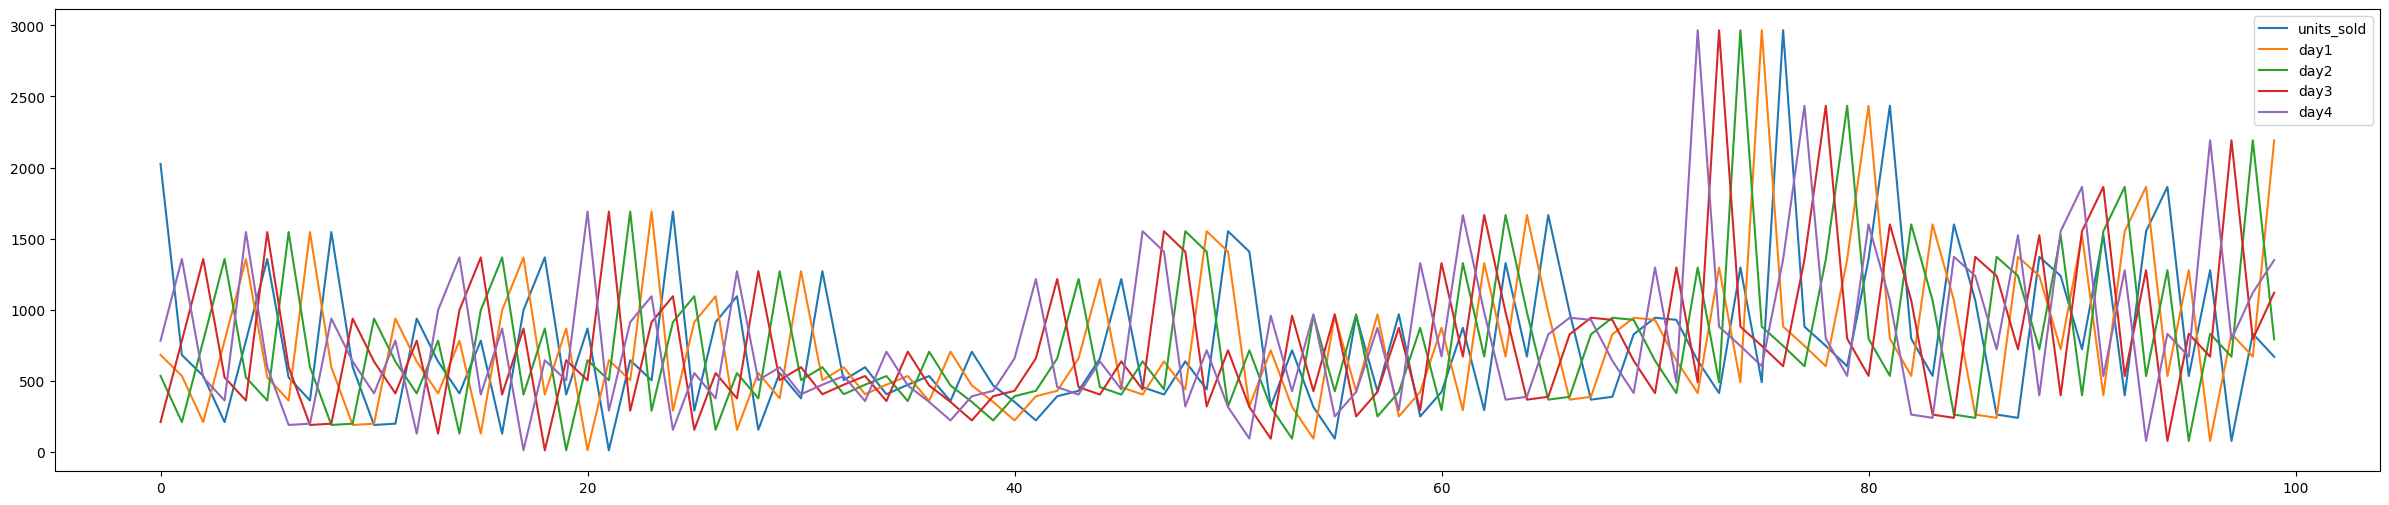

In [371]:
df[:100].plot(figsize=(30,6))

In [372]:
x1, x2, x3, x4, y = np.array(df['day1']), np.array(df['day2']), np.array(df['day3']), np.array(df['day4']), np.array(df['units_sold'])
x1, x2, x3, x4, y = x1.reshape(-1,1), x2.reshape(-1,1), x3.reshape(-1,1), x4.reshape(-1,1), y.reshape(-1,1)

In [373]:
#Test and Train %
split_percentage=15
test_split = int(len(df)*(split_percentage/100))
x = np.concatenate((x1, x2, x3, x4), axis=1)
x_train, x_test, y_train, y_test = x[:-test_split], x[-test_split:], y[:-test_split], y[-test_split:]

4.Model Building with Random Forest

In [374]:
from sklearn.ensemble import RandomForestRegressor

In [375]:
#build Radom Forest model
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [376]:
#calculate score
y_pred = rfr.predict(x_test)
print(rfr.score(x_test, y_test))

0.6837919554589104


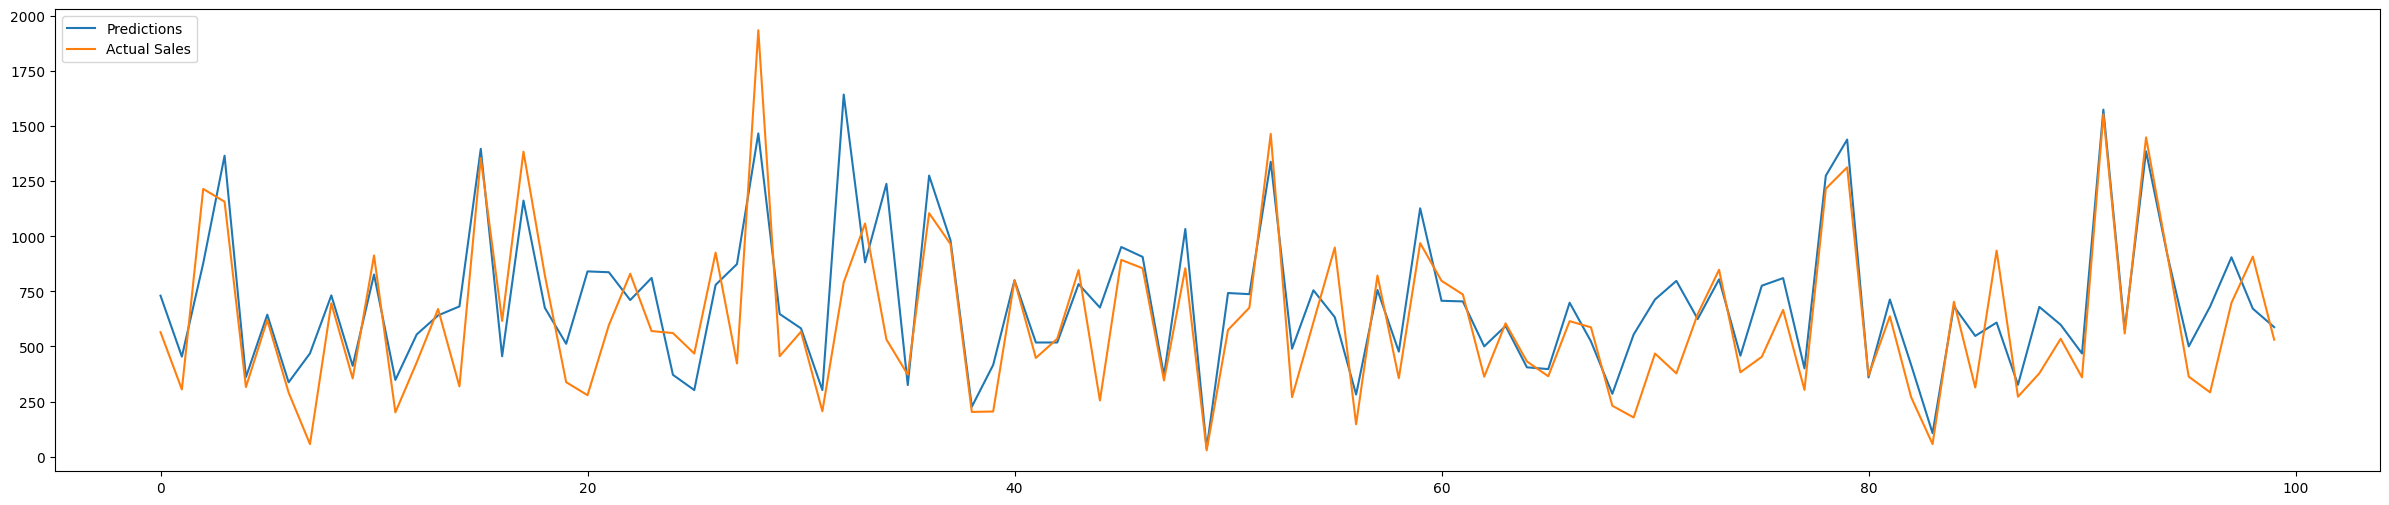

In [377]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,6)
plt.plot(y_pred[-100:], label='Predictions')
plt.plot(y_test[-100:], label='Actual Sales')
plt.legend(loc='upper left')
plt.show()

5.Hyperparameter Tuning for RandomForest

In [378]:
from sklearn.model_selection import RandomizedSearchCV

In [379]:
#random forest trees
n_estimators = [int(x) for x in np.linspace(start=50, stop=250, num=10)]

#each split features
max_features =['auto', 'sqrt']

#tree levels
max_depth = [int(x) for x in np.linspace(start=0, stop=120, num=20)]
max_depth.append(None)

#node split samples
min_samples_split = [2, 5, 10]

#leaf node sampples
min_samples_leaf = [1, 2, 4]

#selecting samples for training
bootstrap = [True, False]

#random grid
random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'bootstrap':bootstrap
                }
print(random_grid)

{'n_estimators': [50, 72, 94, 116, 138, 161, 183, 205, 227, 250], 'max_features': ['auto', 'sqrt'], 'max_depth': [0, 6, 12, 18, 25, 31, 37, 44, 50, 56, 63, 69, 75, 82, 88, 94, 101, 107, 113, 120, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [380]:
#search for best hyperparameters with random grid
#the base model to tune
rfr2 = RandomForestRegressor()

In [381]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rscv = RandomizedSearchCV(estimator=rfr2, param_distributions=random_grid, n_iter=10, cv=3, verbose=2, random_state=0, n_jobs=-1)

In [382]:
#Model fit
rscv.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
21 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [0, 6, 12, 18, 25, 31, 37,
                                                      44, 50, 56, 63, 69, 75,
                                                      82, 88, 94, 101, 107, 113,
                                                      120, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 72, 94, 116, 138,
                                                         161, 183, 205, 227,
                                                         250]},
                   random_state=0, verbose=2)

In [383]:
#Random Search
RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [0, 6, 12, 18, 25, 31, 37,
                                                      44, 50, 56, 63, 69, 75,
                                                      82, 88, 94, 101, 107, 113,
                                                      120, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 72, 94, 116, 138,
                                                         161, 183, 205, 227,
                                                         250]},
                   random_state=0, verbose=2)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [0, 6, 12, 18, 25, 31, 37,
                                                      44, 50, 56, 63, 69, 75,
                                                      82, 88, 94, 101, 107, 113,
                                                      120, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 72, 94, 116, 138,
                                                         161, 183, 205, 227,
                                                         250]},
                   random_state=0, verbose=2)

In [384]:
#best parameters
rscv.best_params_

{'n_estimators': 205,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [385]:
best_estimator = rscv.best_estimator_

In [386]:
#score calculation
y_pred = best_estimator.predict(x_test)
best_estimator.score(x_test, y_test)

0.6736660894589024

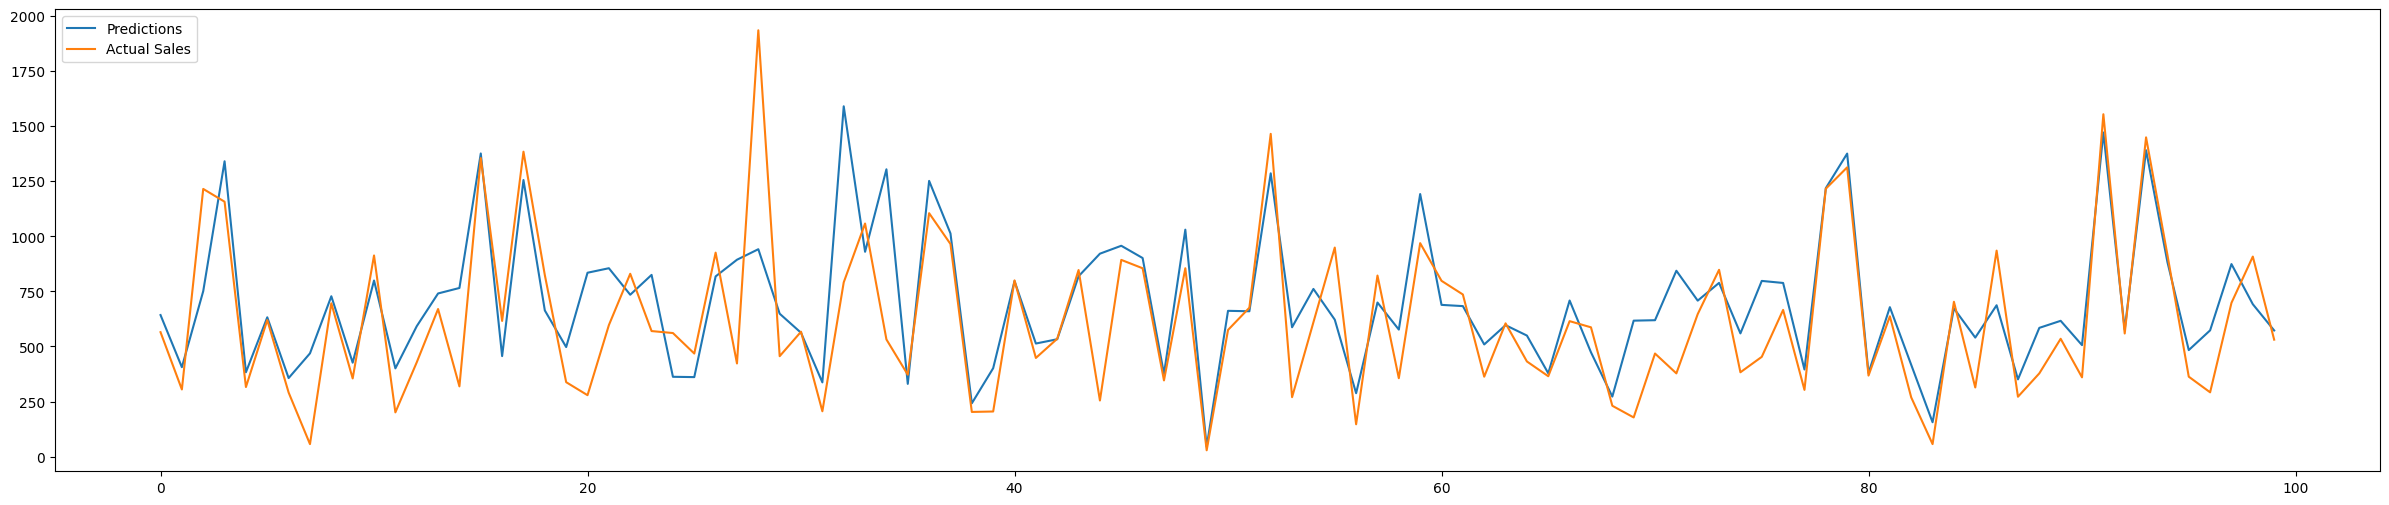

In [387]:
#plot
plt.rcParams["figure.figsize"] = (30,6)
plt.plot(y_pred[-100:], label='Predictions')
plt.plot(y_test[-100:], label='Actual Sales')
plt.legend(loc='upper left')
plt.show()

In [388]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
#Model Evaluation
# Assuming x1, x2, x3, x4, y are your features and target variable
x = np.concatenate((x1, x2, x3, x4), axis=1)
y = y.reshape(-1)  # Reshape y if necessary

# Split data into training and testing sets
split_percentage = 15
test_split = int(len(df) * (split_percentage / 100))
x_train, x_test, y_train, y_test = x[:-test_split], x[-test_split:], y[:-test_split], y[-test_split:]

# Create and train the Random Forest model
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

# Make predictions on the testing set
y_pred = rfr.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Absolute Error (MAE): 166.40
Root Mean Squared Error (RMSE): 258.35
R-squared (R2): 0.68


6.Model building with xgboost

In [389]:
#xgboost model
!pip install xgboost==1.7.5


In [390]:
import xgboost as xgb
from sklearn.model_selection import train_test_split  # Import train_test_split
# Define features (X) and target variable (y)
#drop columns
X = df.drop(['units_sold'], axis=1, errors='ignore')  # Drop 'units_sold
#'demand' column
if 'demand' not in df.columns:
    # Recreate 'demand' column
    df['demand'] = df['units_sold']
y = df['demand']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-390-8b0361f25fad>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['demand'] = df['units_sold']


In [391]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(['units_sold', 'key', 'week_str', 'store_id'], axis=1, errors='ignore')
y = df['demand']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

print("XGBoost model trained successfully.")

XGBoost model trained successfully.


In [392]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions
y_pred = xgb_model.predict(X_test)

#evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
# Print the metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 2.27
Root Mean Squared Error (RMSE): 27.50
R-squared (R2): 1.00


xgboost Model is much better than RandomForest Model based on three performance metrics:

Mean Absolute Error (MAE): 2.27 has a much lower MAE, meaning its predictions are closer to actual values.

Root Mean Squared Error (RMSE): 27.5 has a much lower RMSE, indicating fewer large errors.

R-squared (R²):R² of 1.00, which means it perfectly explains the variance in the data.

Conclusion:
xgboost Model is better fit to the data than RandomForest.